# Laboratory Exercise 5: Advanced Probabilistic Models

In [1]:
#@title **Exercise 1: Setting Up the Environment**

!pip install pgmpy numpy pandas matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 12.4 MB/s eta 0:00:00


In [9]:
#@title **Exercise 2: Building a Simple DBN**

from pgmpy.models import DynamicBayesianNetwork as DBN
from pgmpy.factors.discrete import TabularCPD

dbn = DBN()

# Add nodes to the model
dbn.add_nodes_from(['Rain', 'Sprinkler'])

# Add edges (intra-time and inter-time dependencies)
dbn.add_edges_from([
    (('Rain', 0), ('Sprinkler', 0)),
    (('Rain', 0), ('Rain', 1)),
    (('Sprinkler', 0), ('Sprinkler', 1))
])

# Define Conditional Probability Tables (CPTs)
# CPT for Rain at time t
rain_cpt = TabularCPD(('Rain', 0), variable_card=2, values=[[0.8], [0.2]])

# CPT for Sprinkler at time t
sprinkler_cpt = TabularCPD(('Sprinkler', 0), variable_card=2,
                           values=[[0.9, 0.4], [0.1, 0.6]],
                           evidence=[('Rain', 0)], evidence_card=[2])

# CPT for Rain at time t+1
rain_t1_cpt = TabularCPD(('Rain', 1), variable_card=2,
                         values=[[0.7, 0.3], [0.3, 0.7]],
                         evidence=[('Rain', 0)], evidence_card=[2])

# CPT for Sprinkler at time t+1
sprinkler_t1_cpt = TabularCPD(('Sprinkler', 1), variable_card=2,
                              values=[[0.8, 0.3, 0.6, 0.1],
                                      [0.2, 0.7, 0.4, 0.9]],
                              evidence=[('Rain', 1), ('Sprinkler', 0)],
                              evidence_card=[2, 2])

# Add CPTs to the model
dbn.add_cpds(rain_cpt, sprinkler_cpt, rain_t1_cpt, sprinkler_t1_cpt)

In [10]:
#@title **Exercise 3: Performing Inference**

from pgmpy.inference import DBNInference

dbn_inf = DBNInference(dbn)

evidence = {('Rain', 0): 0, ('Sprinkler', 0): 1}
query_variable = ('Sprinkler', 1)

result = dbn_inf.forward_inference([query_variable], evidence)

print(f"Probability of {query_variable} given evidence {evidence}:")
print(result[query_variable].values)

prob_sprinkler_on = result[query_variable].values[1]
print(f"\nThe probability that the sprinkler will be on in the next time step is {prob_sprinkler_on:.2f}")
print(f"The probability that the sprinkler will be off in the next time step is {1-prob_sprinkler_on:.2f}")

Probability of ('Sprinkler', 1) given evidence {('Rain', 0): 0, ('Sprinkler', 0): 1}:
[0.24 0.76]

The probability that the sprinkler will be on in the next time step is 0.76
The probability that the sprinkler will be off in the next time step is 0.24


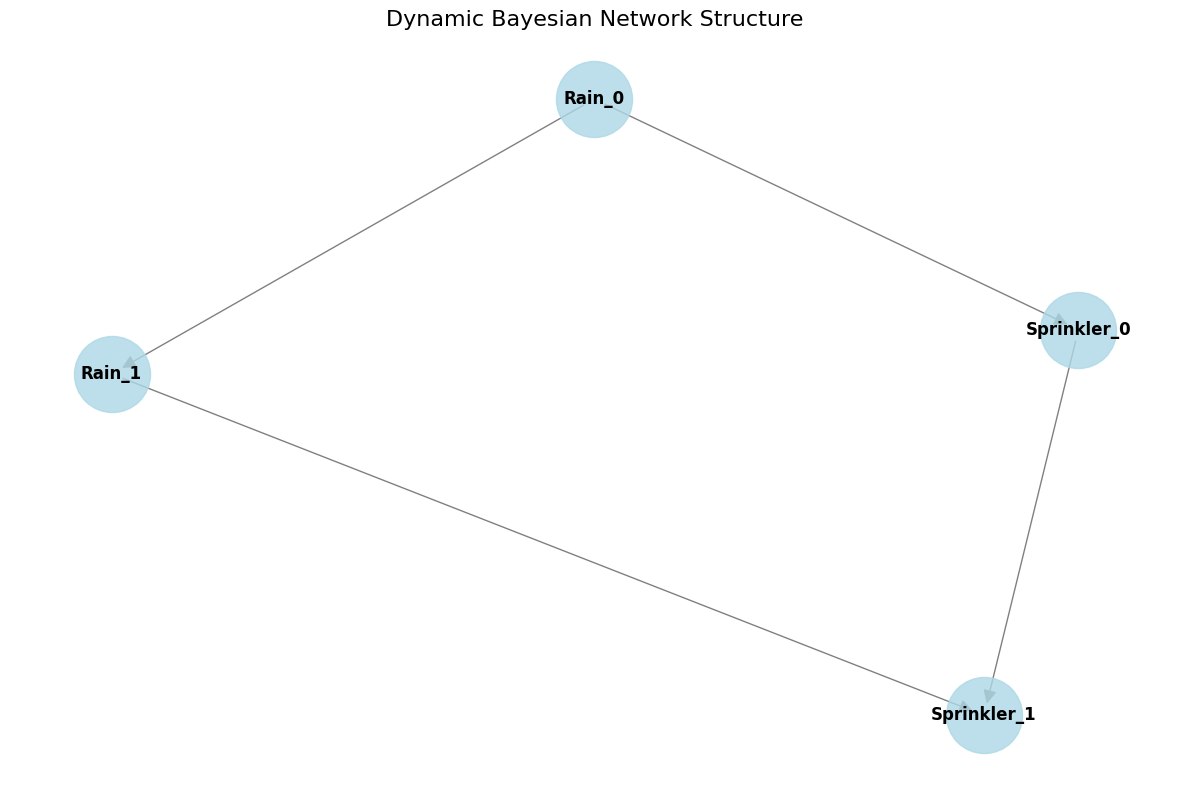

In [11]:
#@title **Exercise 4: Visualizing the DBN**

import networkx as nx
import matplotlib.pyplot as plt

def visualize_dbn(dbn):
    # Create a new graph
    G = nx.DiGraph()

    # Add nodes and edges from the DBN
    for node in dbn.nodes():
        G.add_node(f"{node[0]}_{node[1]}")
    for edge in dbn.edges():
        G.add_edge(f"{edge[0][0]}_{edge[0][1]}", f"{edge[1][0]}_{edge[1][1]}")

    # Set up the plot
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G)

    # Draw the nodes
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=3000, alpha=0.8)
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight="bold")

    # Draw the edges
    nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True, arrowsize=20)

    # Add a title
    plt.title("Dynamic Bayesian Network Structure", fontsize=16)

    # Remove axis
    plt.axis('off')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Visualize the DBN
visualize_dbn(dbn)